# Analyse exploratoire

Cette analyse exploratoire va essentiellement nous permettre de vérifier si la répartition des protéines entre les dossiers d'entraînement et de test est homogène. On ne voudrait pas tester notre modèle avec des données trop différentes de celles avec lesquelles il a été entraîné.

On regardera aussi à quel point des protéines dont les structures primaires sont proches peuvent avoir des structures secondaires différentes (au niveau des hélices).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
pd.set_option("display.max_columns", 30)

# Chargement des données

## Train

In [3]:
data_dir = "data_train/unencode"

X = []

In [4]:
for filename in os.listdir(data_dir):
    f = os.path.join(data_dir, filename)
    X.append(pd.read_csv(f))

len(X)

18231

In [5]:
X[0]

,acids,helix,acid_num
0,PRO,0.0,4
1,PRO,0.0,4
2,TYR,0.0,8
3,THR,0.0,15
4,VAL,0.0,5
...,...,...,...
204,GLY,0.0,1
205,ASN,0.0,18
206,GLY,0.0,1
207,LYS,0.0,13


On va regrouper toutes les protéines en un seul dataframe, avec une ligne par protéine et en désignant les séquences d'acides aminés par des chaînes de caractères où chaque acide aminé est désigné par une seule lettre au lieu de trois actuellement. On procédera de la même façon plus loin pour les données de test.

In [6]:
# Nomination des acides aminés par une seule lettre majuscule
dictionnaire = {
    'ALA':'A',
    'ARG':'R',
    'ASN':'N',
    'ASP':'D',
    'CYS':'C',
    'GLU':'E',
    'GLN':'Q',
    'GLY':'G',
    'HIS':'H',
    'ILE':'I',
    'LEU':'L',
    'LYS':'K',
    'MET':'M',
    'PHE':'F',
    'PRO':'P',
    'SER':'S',
    'THR':'T',
    'TRP':'W',
    'TYR':'Y',
    'VAL':'V'
}

In [7]:
def convert_to_one_df(X):
    '''
    Regroupe les dataframes de la liste X en un seul, comprennant trois variables: la séquence des protéines, 
    la longueurs des séquences et le nombre d'hélices
    '''
    data = pd.concat([df.drop(['helix', 'acid_num'], axis=1) for df in X], axis = 1)
    data = data.T.reset_index(drop=True)
    data = data.replace(dictionnaire)
    data = data.fillna('x')
    data['protein_sequence'] = data[data.columns].apply(lambda x: ', '.join(x), axis = 1)
    data['protein_sequence'] = data['protein_sequence'].apply(lambda x: x.replace(' ','').replace(',','').replace('x',''))
    
    liste_nbre_helix = [X[i]['helix'].sum() for i in range(len(X))]
    data['nbr_helix'] = liste_nbre_helix
    
    data['protein_length'] = data['protein_sequence'].apply(lambda x: len(x))
    return data[['protein_sequence', 'protein_length', 'nbr_helix']]

In [8]:
train = convert_to_one_df(X)
train

,protein_sequence,protein_length,nbr_helix
0,PPYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKAS...,209,129.0
1,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,260,42.0
2,MPPYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKA...,210,133.0
3,KVFERCELARTLKRLGMDGYRGISLANWMCLAKWESGYNTRATNYN...,130,55.0
4,KVFERCELARTLKRLGMDGYRGISLANWMCLAKWESGYNTRATNYN...,130,56.0
...,...,...,...
18226,RWEQTHLTYRIENYTPDLPRADVDHAIEKAFQLWSNVTPLTFTKVS...,157,41.0
18227,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,260,42.0
18228,APVRSLNCTLRDSQQKSLVMSGPYELKALHLQGQDMEQQVVFSMSF...,153,9.0
18229,STQAATASSRNSCAADDKATEPLPKDCPVSSYNEWDPLEEVIVGRA...,386,105.0


In [9]:
train.drop_duplicates(subset='protein_sequence', inplace=True)
train.shape

(11432, 3)

## Test

In [10]:
data_dir = "data_test/unencode"

X = []

In [11]:
for filename in os.listdir(data_dir):
    f = os.path.join(data_dir, filename)
    X.append(pd.read_csv(f))

len(X)

4613

In [12]:
test = convert_to_one_df(X)
test

,protein_sequence,protein_length,nbr_helix
0,MPPYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKA...,210,129.0
1,MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,166,61.0
2,MPPYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKA...,210,117.0
3,MDPFLVLLHSVSSSLSSSELTELKYLCLGRVGKRKLERVQSGLDLF...,91,58.0
4,ARTVVLITGCSSGIGLHLAVRLASDPSQSFKVYATLRDLKTQGRLW...,289,154.0
...,...,...,...
4608,MTEYKLVVVGAPGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,166,61.0
4609,YNVFPRTLKWSKMNLTYRIVNYTPDMTHSEVEKAFKKAFKVWSDVT...,168,41.0
4610,DTSHHDQDHPTFNKITPNLAEFAFSLYRQLAHQSNSTNIFFSPVSI...,347,127.0
4611,SYELTQPPSVSVSPGQTARITCSANALPNQYAYWYQQKPGRAPVMV...,212,24.0


In [13]:
test.drop_duplicates(subset='protein_sequence', inplace=True)
test.shape

(3600, 3)

Passons maintenant à l'analyse des données. On commence par l'étude de nos deux variables numériques.

## Longueur des protéines et nombre d'hélices

In [14]:
train[['protein_length', 'nbr_helix']].describe()

,protein_length,nbr_helix
count,11432.000000,11432.000000
mean,263.584675,105.486529
std,192.541499,95.538867
min,10.000000,3.000000
25%,137.000000,34.000000
50%,222.000000,81.000000
75%,331.000000,147.000000
max,4646.000000,933.000000


In [15]:
test[['protein_length', 'nbr_helix']].describe()

,protein_length,nbr_helix
count,3600.000000,3600.000000
mean,270.861111,107.235833
std,193.686387,91.958026
min,23.000000,3.000000
25%,142.000000,35.000000
50%,235.000000,84.000000
75%,340.000000,153.000000
max,4128.000000,970.000000


[Text(0.5, 0, 'test: nbr_helix')]

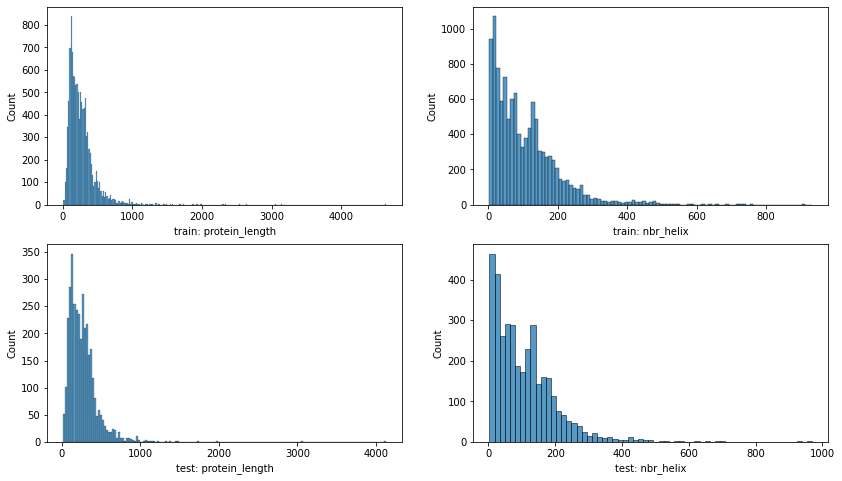

In [16]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))

sns.histplot(data=train, x='protein_length', ax=axs[0, 0]).set(xlabel='train: protein_length')
sns.histplot(data=train, x='nbr_helix', ax=axs[0, 1]).set(xlabel='train: nbr_helix')
sns.histplot(data=test, x='protein_length', ax=axs[1, 0]).set(xlabel='test: protein_length')
sns.histplot(data=test, x='nbr_helix', ax=axs[1, 1]).set(xlabel='test: nbr_helix')

On remarque que les données on été bien réparties entre l'entraînement et le test selon ces deux variables, puisque les histogramme sont très similaires.

Les tracés ci-dessous du nombre d'hélices en fonction de la longueur des séquences sont aussi très proches.

[Text(0.5, 0, 'protein_length (test)')]

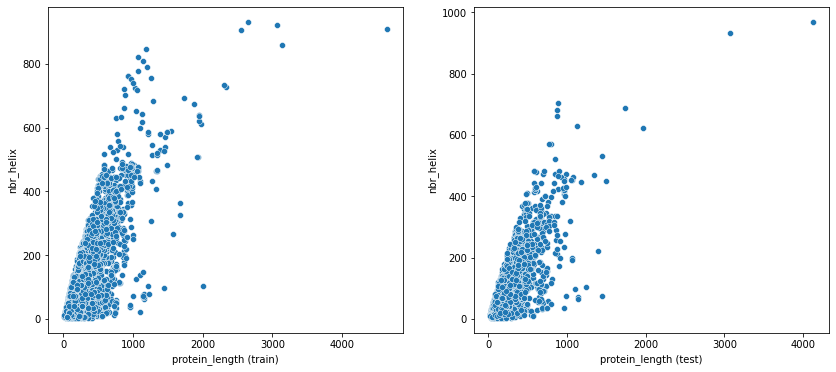

In [17]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

sns.scatterplot(data=train, x='protein_length', y='nbr_helix', ax=axs[0]).set(xlabel='protein_length (train)')
sns.scatterplot(data=test, x='protein_length', y='nbr_helix', ax=axs[1]).set(xlabel='protein_length (test)')

## Acides aminés

On va tout d'abord regarder la répartition des différents acides aminés à travers chacun des jeux 'train' et 'test'. 

Text(0.5, 0, "Quantité de chaque acide aminé à travers tout 'train'")

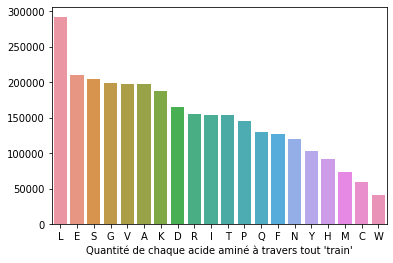

In [21]:
amino_count = train['protein_sequence'].str.split('').explode('protein_sequence').value_counts().drop('')
bar = sns.barplot(x=amino_count.index, y=amino_count)
bar.set_ylabel('')
bar.set_xlabel('Quantité de chaque acide aminé à travers tout \'train\'')

Text(0.5, 0, "Quantité de chaque acide aminé à travers tout 'test'")

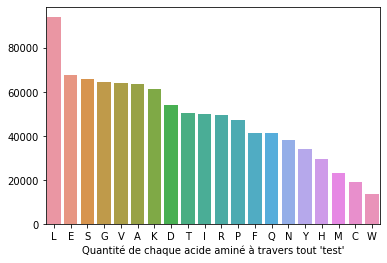

In [23]:
amino_count = test['protein_sequence'].str.split('').explode('protein_sequence').value_counts().drop('')
bar = sns.barplot(x=amino_count.index, y=amino_count)
bar.set_ylabel('')
bar.set_xlabel('Quantité de chaque acide aminé à travers tout \'test\'')

Sur ce point aussi, les jeux 'train' et 'test' sont très similaires. 

On va ensuite voir si des acides aminés ne se démarqueraient pas des autres par leur corrélation avec le nombre d'hélices.

In [20]:
train['dataset'] = 'train'
test['dataset'] = 'test'

In [21]:
df = pd.concat([train, test])
df

,protein_sequence,protein_length,nbr_helix,dataset
0,PPYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKAS...,209,129.0,train
1,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,260,42.0,train
2,MPPYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKA...,210,133.0,train
3,KVFERCELARTLKRLGMDGYRGISLANWMCLAKWESGYNTRATNYN...,130,55.0,train
4,KVFERCELARTLKRLGMDGYRGISLANWMCLAKWESGYNTRATNYN...,130,56.0,train
...,...,...,...,...
4605,GSHMASSCAVQVKLELGHRAQVRKKPTVEGFTHDWMVFVRGPEHSN...,141,18.0,test
4606,MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,171,70.0,test
4607,STQAATASSRNSCAADDKATEPLPKDCPVSSYNEWDPLEEVIVGRA...,386,107.0,test
4610,DTSHHDQDHPTFNKITPNLAEFAFSLYRQLAHQSNSTNIFFSPVSI...,347,127.0,test


In [22]:
amino_list = list(amino_count.index)

In [23]:
def count_amino(prot, am):
    count = len([l for l in prot if l==am])
    return count

In [24]:
for amino in amino_list:
    df[amino] = df['protein_sequence'].apply(lambda x: count_amino(x, amino))

In [25]:
df

,protein_sequence,protein_length,nbr_helix,dataset,L,E,S,G,V,A,K,D,T,I,R,P,F,Q,N,Y,H,M,C,W
0,PPYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKAS...,209,129.0,train,32,10,10,18,14,15,12,13,9,7,8,11,7,13,8,12,2,2,4,2
1,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,260,42.0,train,26,13,18,22,16,14,24,19,12,9,7,17,12,11,10,8,12,2,1,7
2,MPPYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKA...,210,133.0,train,32,10,10,18,14,15,12,13,9,7,8,11,7,13,8,12,2,3,4,2
3,KVFERCELARTLKRLGMDGYRGISLANWMCLAKWESGYNTRATNYN...,130,55.0,train,8,3,6,11,9,14,5,8,5,5,13,2,2,6,10,6,2,2,8,5
4,KVFERCELARTLKRLGMDGYRGISLANWMCLAKWESGYNTRATNYN...,130,56.0,train,8,4,6,11,9,14,5,8,5,5,13,2,2,6,10,6,1,2,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4605,GSHMASSCAVQVKLELGHRAQVRKKPTVEGFTHDWMVFVRGPEHSN...,141,18.0,test,11,13,6,7,14,5,13,5,4,3,10,11,11,3,5,3,10,2,3,2
4606,MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,171,70.0,test,13,13,8,11,15,11,10,14,11,11,12,3,5,11,4,9,3,4,3,0
4607,STQAATASSRNSCAADDKATEPLPKDCPVSSYNEWDPLEEVIVGRA...,386,107.0,test,21,23,20,18,21,29,24,27,23,30,23,29,17,10,16,15,11,11,8,10
4610,DTSHHDQDHPTFNKITPNLAEFAFSLYRQLAHQSNSTNIFFSPVSI...,347,127.0,test,43,29,19,20,20,22,28,22,27,17,7,11,23,14,16,6,13,7,1,2


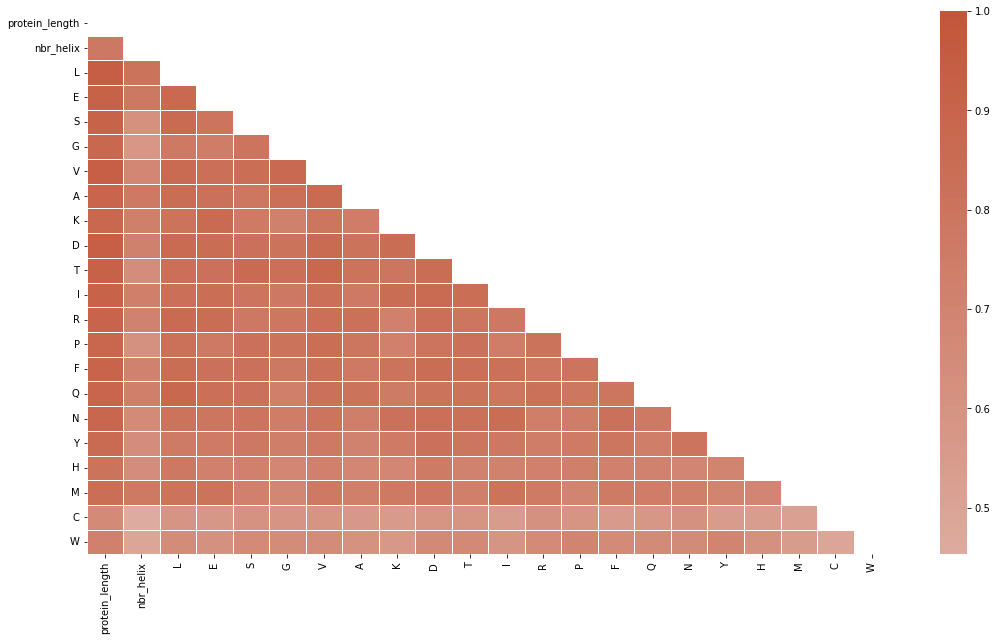

In [26]:
corr = df.drop(['protein_sequence', 'dataset'], axis=1).corr()

plt.figure(figsize=(18,10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, linewidths=0.5)
plt.show()

Les lignes plus claires (C et W) correspondent aux deux acides aminés les moins présents. Il n'y a pas de corrélation particulièrement marquée au niveau du nombre d'hélices.

## Protéines et variants

Dans cette partie nous allons regrouper les protéines ayant des séquences d'acides aminés très proche. Ici "très proche" correspond à un faible distance de Levenshtein.

In [27]:
from Levenshtein import distance as lev
import timeit

In [28]:
df = df.reset_index(drop=True)

In [29]:
df

,protein_sequence,protein_length,nbr_helix,dataset,L,E,S,G,V,A,K,D,T,I,R,P,F,Q,N,Y,H,M,C,W
0,PPYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKAS...,209,129.0,train,32,10,10,18,14,15,12,13,9,7,8,11,7,13,8,12,2,2,4,2
1,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,260,42.0,train,26,13,18,22,16,14,24,19,12,9,7,17,12,11,10,8,12,2,1,7
2,MPPYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKA...,210,133.0,train,32,10,10,18,14,15,12,13,9,7,8,11,7,13,8,12,2,3,4,2
3,KVFERCELARTLKRLGMDGYRGISLANWMCLAKWESGYNTRATNYN...,130,55.0,train,8,3,6,11,9,14,5,8,5,5,13,2,2,6,10,6,2,2,8,5
4,KVFERCELARTLKRLGMDGYRGISLANWMCLAKWESGYNTRATNYN...,130,56.0,train,8,4,6,11,9,14,5,8,5,5,13,2,2,6,10,6,1,2,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15027,GSHMASSCAVQVKLELGHRAQVRKKPTVEGFTHDWMVFVRGPEHSN...,141,18.0,test,11,13,6,7,14,5,13,5,4,3,10,11,11,3,5,3,10,2,3,2
15028,MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,171,70.0,test,13,13,8,11,15,11,10,14,11,11,12,3,5,11,4,9,3,4,3,0
15029,STQAATASSRNSCAADDKATEPLPKDCPVSSYNEWDPLEEVIVGRA...,386,107.0,test,21,23,20,18,21,29,24,27,23,30,23,29,17,10,16,15,11,11,8,10
15030,DTSHHDQDHPTFNKITPNLAEFAFSLYRQLAHQSNSTNIFFSPVSI...,347,127.0,test,43,29,19,20,20,22,28,22,27,17,7,11,23,14,16,6,13,7,1,2


On attribut à chaque ligne, donc à chaque protéine, un numéro de groupe. Des protéines ont le même numéro de groupe si la distance de Levenshtein entre elles est plus petite que 3.

In [30]:
# On commence par récupérer les index des protéines proches entre elles.
copy_df = df.copy()
dic = {}
n_group = 1
start_time = timeit.default_timer()
while copy_df.shape[0] > 0 :
    l = []
    a = copy_df['protein_sequence'].iloc[0]
    for i in copy_df.index:
        if lev(a, copy_df['protein_sequence'].loc[i])<= 3:
            l.append(i)
    dic[n_group] = l
    n_group += 1
    copy_df.drop(l, axis=0, inplace=True)
    
temps = timeit.default_timer() - start_time
print(temps)

550.8802632


In [31]:
liste = [dic[i] for i in dic.keys()]
d = {'col1': liste}
groupes = pd.DataFrame(data=d, index=dic.keys())
groupes

,col1
1,"[0, 2, 5, 456, 457, 1014, 1167, 1450, 1480, 23..."
2,"[1, 23, 165, 248, 249, 250, 252, 256, 257, 294..."
3,"[3, 4, 125, 126, 127, 128, 129, 135, 136, 137,..."
4,"[6, 20, 60, 220, 228, 912, 1326, 1329, 1570, 1..."
5,"[7, 12, 11928]"
...,...
9615,[15020]
9616,[15021]
9617,[15023]
9618,[15024]


In [32]:
# Combien de protéines compte le groupe le plus gros?
groupes['col1'].apply(lambda x: len(x)).max()

151

On aura donc au moins un groupe suffisament important pour être analysé.

In [33]:
df['groupe'] = np.nan
for i in range(groupes.shape[0]):
    for j in groupes['col1'].values[i]:
        df['groupe'].loc[j] = i

C:\Users\tony.mathieux\AppData\Local\Temp\ipykernel_3188\716680056.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['groupe'].loc[j] = i


In [34]:
df

,protein_sequence,protein_length,nbr_helix,dataset,L,E,S,G,V,A,K,D,T,I,R,P,F,Q,N,Y,H,M,C,W,groupe
0,PPYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKAS...,209,129.0,train,32,10,10,18,14,15,12,13,9,7,8,11,7,13,8,12,2,2,4,2,0.0
1,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,260,42.0,train,26,13,18,22,16,14,24,19,12,9,7,17,12,11,10,8,12,2,1,7,1.0
2,MPPYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKA...,210,133.0,train,32,10,10,18,14,15,12,13,9,7,8,11,7,13,8,12,2,3,4,2,0.0
3,KVFERCELARTLKRLGMDGYRGISLANWMCLAKWESGYNTRATNYN...,130,55.0,train,8,3,6,11,9,14,5,8,5,5,13,2,2,6,10,6,2,2,8,5,2.0
4,KVFERCELARTLKRLGMDGYRGISLANWMCLAKWESGYNTRATNYN...,130,56.0,train,8,4,6,11,9,14,5,8,5,5,13,2,2,6,10,6,1,2,8,5,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15027,GSHMASSCAVQVKLELGHRAQVRKKPTVEGFTHDWMVFVRGPEHSN...,141,18.0,test,11,13,6,7,14,5,13,5,4,3,10,11,11,3,5,3,10,2,3,2,2996.0
15028,MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,171,70.0,test,13,13,8,11,15,11,10,14,11,11,12,3,5,11,4,9,3,4,3,0,39.0
15029,STQAATASSRNSCAADDKATEPLPKDCPVSSYNEWDPLEEVIVGRA...,386,107.0,test,21,23,20,18,21,29,24,27,23,30,23,29,17,10,16,15,11,11,8,10,688.0
15030,DTSHHDQDHPTFNKITPNLAEFAFSLYRQLAHQSNSTNIFFSPVSI...,347,127.0,test,43,29,19,20,20,22,28,22,27,17,7,11,23,14,16,6,13,7,1,2,8382.0


In [35]:
# On regroupe les protéines proches, c'est-à-dire de même numéro de groupe
group_df = df.groupby(['groupe'])
group_df = group_df.agg({
    'protein_sequence': 'count',
    'protein_length': 'mean',
    'nbr_helix': 'mean'
})

In [36]:
group_df

,protein_sequence,protein_length,nbr_helix
groupe,,,
0.0,20,209.250000,140.600000
1.0,101,259.623762,47.445545
2.0,151,129.986755,57.841060
3.0,34,140.852941,114.235294
4.0,3,107.000000,23.333333
...,...,...,...
9614.0,1,279.000000,110.000000
9615.0,1,393.000000,192.000000
9616.0,1,235.000000,215.000000


In [37]:
group_df['protein_sequence'].value_counts()

1      7235
2      1454
3       418
4       207
5        91
6        54
7        42
8        26
9        23
10       14
12       11
11        9
13        7
15        6
20        2
14        2
21        2
101       1
30        1
52        1
17        1
32        1
34        1
28        1
151       1
31        1
22        1
23        1
53        1
18        1
16        1
25        1
24        1
Name: protein_sequence, dtype: int64

On va regarder seulement les groupes de plus de 100 protéines.

In [38]:
group_df = group_df[group_df['protein_sequence'] > 100]
group_df

,protein_sequence,protein_length,nbr_helix
groupe,,,
1.0,101,259.623762,47.445545
2.0,151,129.986755,57.841060


In [39]:
df[df['groupe'] == 1]

,protein_sequence,protein_length,nbr_helix,dataset,L,E,S,G,V,A,K,D,T,I,R,P,F,Q,N,Y,H,M,C,W,groupe
1,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,260,42.0,train,26,13,18,22,16,14,24,19,12,9,7,17,12,11,10,8,12,2,1,7,1.0
23,SHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKPL...,259,49.0,train,26,13,18,22,17,13,24,19,12,9,7,17,12,11,10,8,12,1,1,7,1.0
165,SHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKPL...,259,42.0,train,26,13,18,22,17,13,24,19,11,9,7,17,12,11,10,8,13,1,1,7,1.0
248,SHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKPL...,259,42.0,train,26,12,18,22,17,14,24,19,12,9,7,17,12,11,10,8,12,1,1,7,1.0
249,SHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKPL...,259,42.0,train,26,12,18,22,17,13,24,20,12,9,7,17,12,11,10,8,12,1,1,7,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14504,MGMSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSL...,262,50.0,test,26,13,18,23,17,13,24,19,12,9,7,17,12,11,10,8,12,3,1,7,1.0
14646,AHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKPL...,259,53.0,test,26,13,17,22,17,14,24,19,12,9,7,17,12,11,10,8,12,1,1,7,1.0
14701,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,260,50.0,test,26,13,19,22,17,13,24,19,12,9,7,17,11,11,10,8,12,2,1,7,1.0
14710,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,260,53.0,test,25,13,18,23,17,13,24,19,12,9,7,17,12,11,10,8,12,2,1,7,1.0


In [40]:
df[df['groupe'] == 2]

,protein_sequence,protein_length,nbr_helix,dataset,L,E,S,G,V,A,K,D,T,I,R,P,F,Q,N,Y,H,M,C,W,groupe
3,KVFERCELARTLKRLGMDGYRGISLANWMCLAKWESGYNTRATNYN...,130,55.0,train,8,3,6,11,9,14,5,8,5,5,13,2,2,6,10,6,2,2,8,5,2.0
4,KVFERCELARTLKRLGMDGYRGISLANWMCLAKWESGYNTRATNYN...,130,56.0,train,8,4,6,11,9,14,5,8,5,5,13,2,2,6,10,6,1,2,8,5,2.0
125,KVFERCELARTLKRLGMDGYRGIALANWMCLAKWESGYNTRATNYN...,130,55.0,train,8,3,5,11,9,15,5,8,5,5,14,2,2,6,10,6,1,2,8,5,2.0
126,KVFERCELARTLKRLGMDGYRGISLANWMCLAKWESGYNTRATNYN...,130,54.0,train,8,3,5,11,9,15,5,8,5,5,14,2,2,6,10,6,1,2,8,5,2.0
127,KVFERCELARTLKRLGMDGYRGISLANWMCLAKWESGYNTRATNYN...,130,55.0,train,8,3,5,11,9,15,5,8,5,5,14,2,2,6,10,6,1,2,8,5,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12068,KVFERCELARTLKRLGMDGYRGISLANWMCLAKWESGYNTRATNYN...,130,51.0,test,8,3,6,11,10,14,5,8,5,4,14,2,2,6,10,6,1,2,8,5,2.0
12069,KVFERCELARTLKRLGMDGYRGISLANWMCLAKWESGYNTRATNYN...,130,50.0,test,8,3,6,11,10,14,5,8,5,4,14,2,2,6,10,6,1,2,8,5,2.0
12124,KVFERCELARTLKRLGMDGYRGISLANWMCLAKWESGYNTRATNYN...,130,55.0,test,8,3,6,11,9,15,5,8,5,5,14,2,2,6,10,6,1,2,7,5,2.0
12507,KVFERCELARTLKRLGMDGYRGISLANWMCLAKWESGYNTRATNYN...,130,55.0,test,9,3,6,11,9,14,5,8,5,4,14,2,2,6,10,6,1,2,8,5,2.0


On voit qu'il y a à chaque fois des protéines dans 'train' et d'autres dans 'test', mais vérifions précisément les effectifs.

In [41]:
df[df['groupe'] == 1]['dataset'].value_counts()

train    67
test     34
Name: dataset, dtype: int64

In [42]:
df[df['groupe'] == 2]['dataset'].value_counts()

train    114
test      37
Name: dataset, dtype: int64

C'est cohérent avec la taille des jeux d'entraînement et de test.

Pour terminer cette analyse exploratoire, nous allons regarder comment varie le nombre d'hélices au sein de ces deux groupes.

[Text(0.5, 0, 'nbr_helix: groupe 2')]

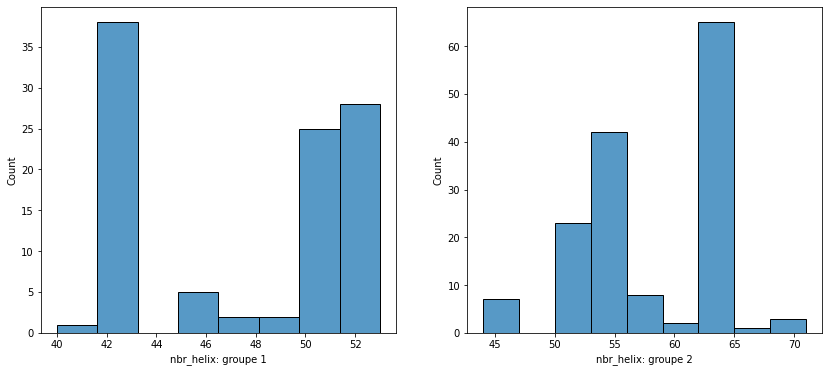

In [43]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

sns.histplot(data=df[df['groupe'] == 1], x='nbr_helix', ax=axs[0]).set(xlabel='nbr_helix: groupe 1')
sns.histplot(data=df[df['groupe'] == 2], x='nbr_helix', ax=axs[1]).set(xlabel='nbr_helix: groupe 2')

<AxesSubplot: xlabel='nbr_helix', ylabel='groupe'>

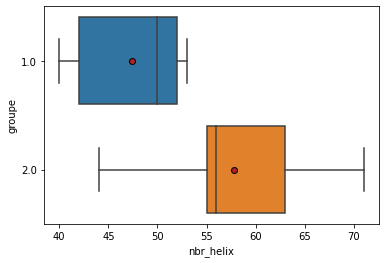

In [44]:
meanprops = {'marker':'o', 'markeredgecolor':'black', 'markerfacecolor':'firebrick'}

sns.boxplot(x="nbr_helix", y="groupe", showfliers=False, showmeans=True, meanprops=meanprops,
            orient='h', data=df[df['groupe'].isin([1, 2])])


Une petite variation sur la structure principale d'une protéine peut donc avoir un impact assez important sur sa structure secondaire.